In [1]:
import cv2
import matplotlib.pyplot as plt

### converting RGB to grayscale

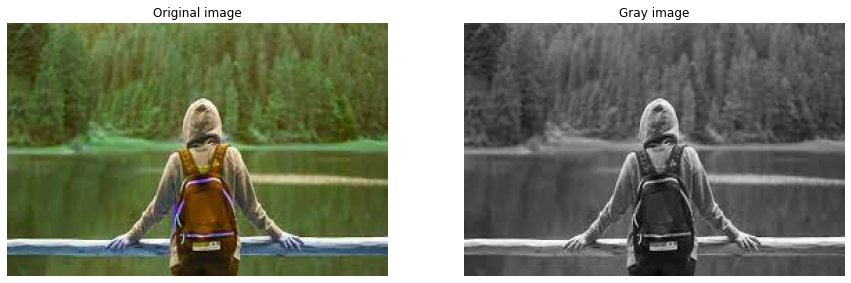

In [22]:
img = cv2.imread('Images/Boy pic.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Gray image")
plt.imshow(gray, cmap="gray")
plt.axis("off")

plt.show()

In [6]:
img = cv2.imread('Images/Boy pic.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)
cv2.waitKey(0)

-1

In [23]:
def img_gray_cvt(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("Original image")
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Gray image")
    plt.imshow(gray, cmap="gray")
    plt.axis("off")
    
    plt.show()

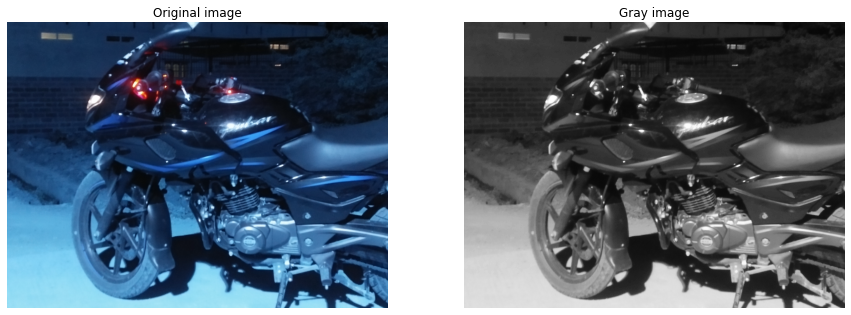

In [24]:
img_gray_cvt("Images/Img_1.jpg")

### Bluring the image

In [26]:
def blur_img(path, Blur_intencity):
    img = cv2.imread(path)
    blur = cv2.GaussianBlur(img, (Blur_intencity[0],Blur_intencity[1]), cv2.BORDER_DEFAULT)
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("Original image")
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Blur image")
    plt.imshow(blur)
    plt.axis("off")
    
    plt.show()

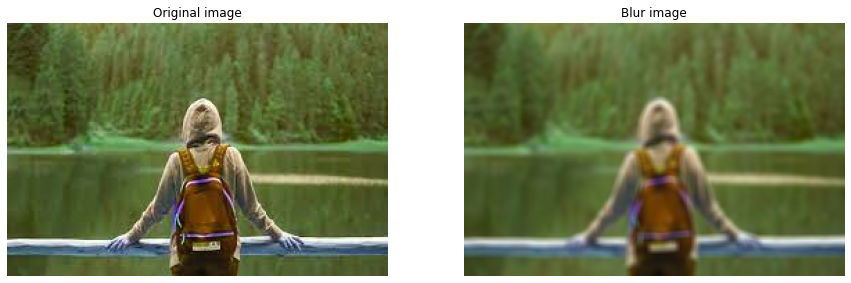

In [28]:
blur_img('Images/Boy pic.jpg',[5,5])

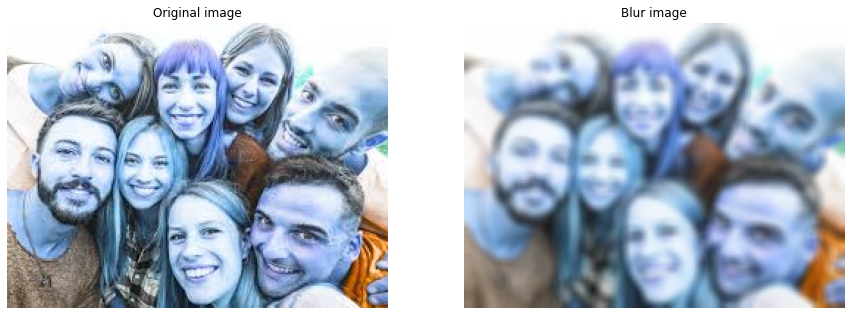

In [31]:
blur_img('Images/peple.jpg',[7,7])

## Edge cascade
* Edge detection is an image-processing technique, which is used to identify the boundaries (edges) of objects, or regions within an image
* using canny function

In [33]:
img = cv2.imread("Images/Boy pic.jpg")
canny = cv2.Canny(img, 125,175)
cv2.imshow("canny",canny)
cv2.waitKey(0)

-1

In [43]:
def edges_of_img(path, threshold_1,threshold_2):
    img = cv2.imread(path)
    canny = cv2.Canny(img, threshold_1, threshold_2)
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("Original image")
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("edges detected image by canny cascade")
    plt.imshow(canny)
    plt.axis("off")
    
    plt.show()

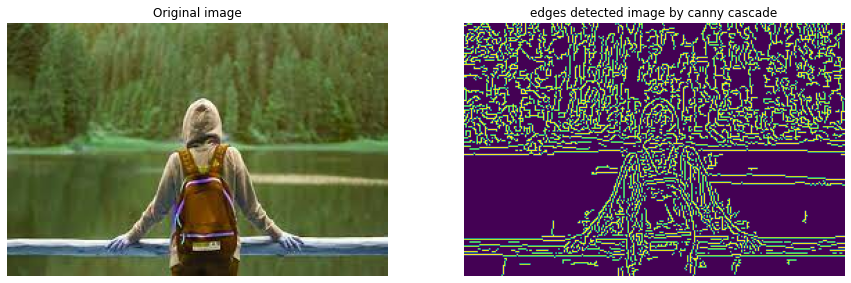

In [35]:
edges_of_img("Images/Boy pic.jpg", 45,96)

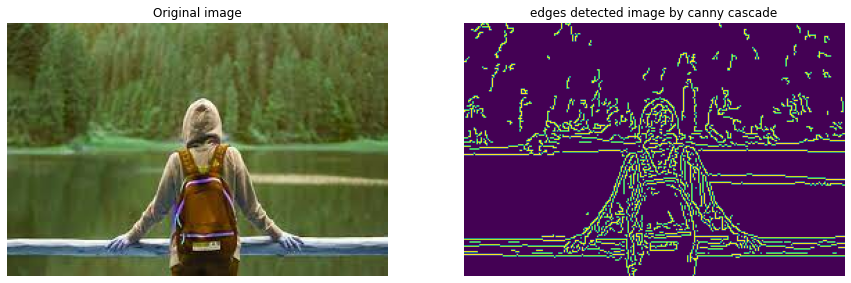

In [36]:
edges_of_img("Images/Boy pic.jpg", 150,96)

### Reduce the edeges by passing blur image into canny cascade

In [40]:
def edges_of_blur_img(img,b_img, threshold_1,threshold_2):
    
    canny = cv2.Canny(img, threshold_1, threshold_2)
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("Original image")
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("edges detected image by canny cascade")
    plt.imshow(canny)
    plt.axis("off")
    
    plt.show()

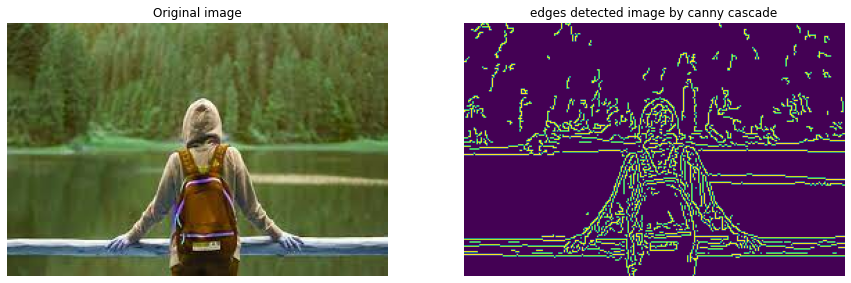

In [41]:
img = cv2.imread("Images/Boy pic.jpg")
blur_image = cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT)
edges_of_blur_img(img,blur_image, 150,96)

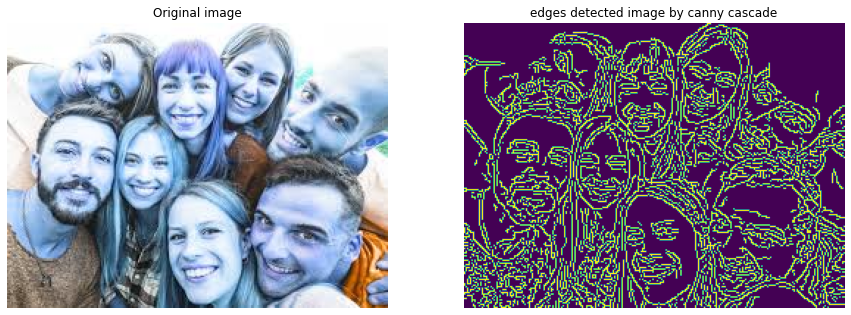

In [44]:
edges_of_img("Images/peple.jpg", 150,96)

## Dilatinng the image
* Image Dilation is another important morphological operation used to increase or expand shapes contained in the input image. Think of this as “ diluting ” the image. Diluting anything requires water, here we need a structuring element or kernel.

In [46]:
img = cv2.imread("Images/Boy pic.jpg")
canny = cv2.Canny(img, 125,175)
dilated = cv2.dilate(canny, (3,3), iterations=1)
cv2.imshow("canny",canny)
cv2.imshow("dilated",dilated)
cv2.waitKey(0)

-1

In [56]:
# Note :-kernal_for_canny = it must be into tuple and odd values ex:-(3,3) or (7,7) etc
def imf_canny_dilated(path,th_1,th_2,kernal_for_canny,iteration):
    img = cv2.imread(path)
    canny = cv2.Canny(img, th_1, th_2)
    dilated = cv2.dilate(canny, kernal_for_canny,iterations=iteration)
    
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    plt.title("Original img")
    plt.imshow(img)
    plt.axis("off")
    
    plt.subplot(1,3,2)
    plt.title("edges of img")
    plt.imshow(canny)
    plt.axis("off")
    
    plt.subplot(1,3,3)
    plt.title("dilated img")
    plt.imshow(dilated)
    plt.axis("off")

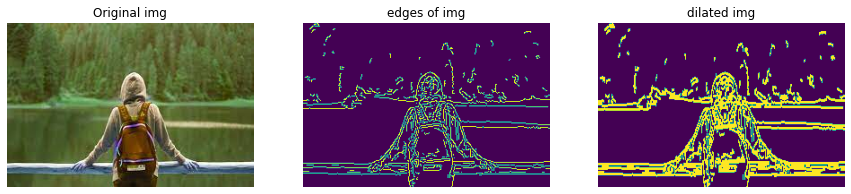

In [57]:
imf_canny_dilated("Images/Boy pic.jpg", 125,175, (3,3), iteration=2)

* Number of iteration increase the dilation of image

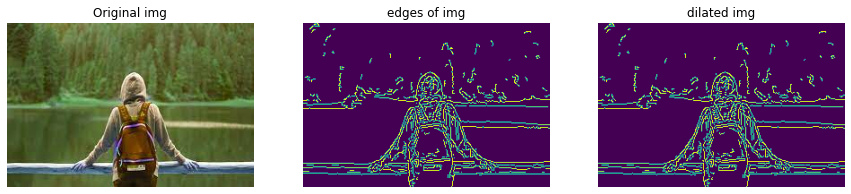

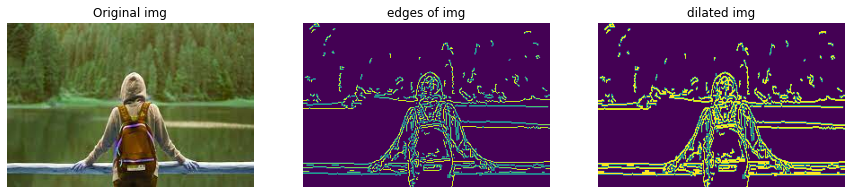

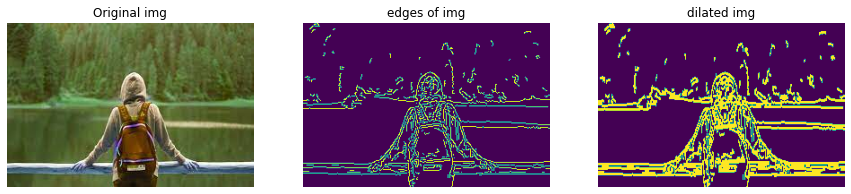

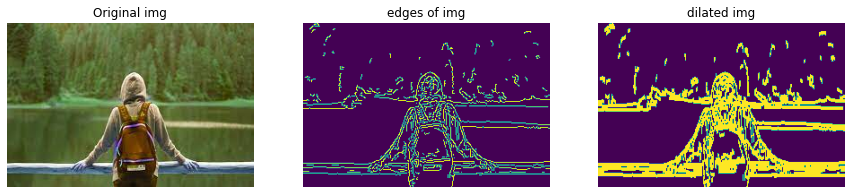

In [64]:
for i in range(4):
    imf_canny_dilated("Images/Boy pic.jpg", 125,175, (3,3),iteration=i)

## Eroded dilated image
* What is erode in OpenCV?
OpenCV-Python is a library of Python bindings designed to solve computer vision problems. cv2. erode() method is used to perform erosion on the image. The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white)

In [59]:
img = cv2.imread("Images/Boy pic.jpg")
canny = cv2.Canny(img, 125,175)
dilated = cv2.dilate(canny, (5,5), iterations=1)
eroded = cv2.erode(dilated, (5,5), iterations=1)
cv2.imshow("canny",canny)
cv2.imshow("dilated",dilated)
cv2.imshow("eroded",eroded)

cv2.waitKey(0)

-1

In [69]:
# Note :-kernal_for_canny = it must be into tuple and odd values ex:-(3,3) or (7,7) etc
# note :-kernal_for_canny = 
def imf_canny_dilated_erode(path,th_1,th_2,kernal_for_canny,kernal_for_erode,iteration):
    img = cv2.imread(path)
    canny = cv2.Canny(img, th_1, th_2)
    dilated = cv2.dilate(canny, kernal_for_canny,iterations=iteration)
    eroded = cv2.erode(dilated, kernal_for_erode, iterations=1)
    
    plt.figure(figsize=(15,10))
    plt.subplot(1,4,1)
    plt.title("Original img")
    plt.imshow(img)
    plt.axis("off")
    
    plt.subplot(1,4,2)
    plt.title("edges of img")
    plt.imshow(canny)
    plt.axis("off")
    
    plt.subplot(1,4,3)
    plt.title("dilated img")
    plt.imshow(dilated)
    plt.axis("off")
    
    plt.subplot(1,4,4)
    plt.title("erode img")
    plt.imshow(eroded)
    plt.axis("off")

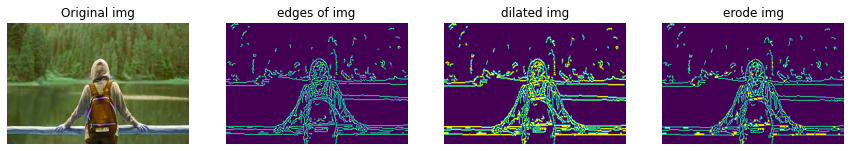

In [70]:
imf_canny_dilated_erode("Images/Boy pic.jpg", 125,175, (3,3),(3,3),iteration=1)

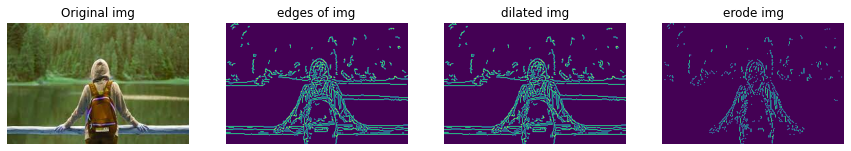

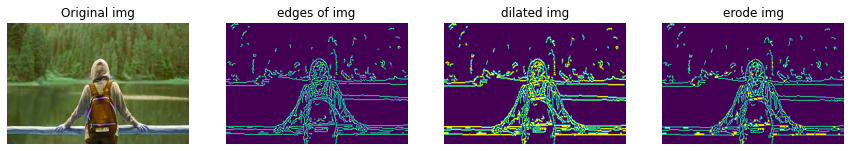

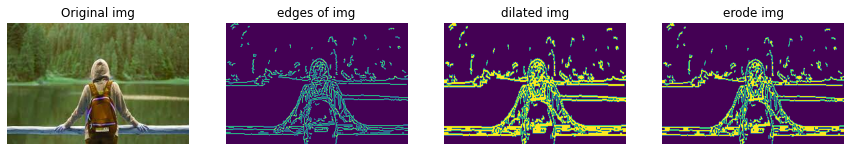

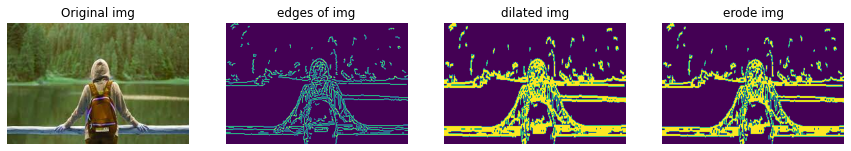

In [71]:
for i in range(4):
    imf_canny_dilated_erode("Images/Boy pic.jpg", 125,175, (3,3),(3,3),iteration=i)